<a href="https://colab.research.google.com/github/tomhyhan/noodles/blob/main/pasta_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import userdata
from google.colab import auth

auth.authenticate_user()
token = userdata.get('token')
username = userdata.get('username')
repo_name = "noodles"

In [3]:
import os

!git clone https://github.com/tomhyhan/{repo_name}.git

if os.getcwd() != f"/content/{repo_name}":
    %cd {repo_name}
!git pull
!pwd


Cloning into 'noodles'...
remote: Enumerating objects: 257, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 257 (delta 4), reused 8 (delta 3), pack-reused 244 (from 1)
Receiving objects: 100% (257/257), 1.38 MiB | 31.39 MiB/s, done.
Resolving deltas: 100% (139/139), done.
/content/noodles
Already up to date.
/content/noodles


In [4]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import os
import sys

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = "noodles"

GOOGLE_DRIVE_PATH = os.path.join("..", "drive", "My Drive", GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)


In [6]:

from model.utils import test_colab
test_colab()


Hello Colab! from Noodles ha


In [7]:
!pip install torchinfo
!pip install imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 76.2 MB/s eta 0:00:00


In [8]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold


from config.config_manager import ConfigManager
from collections import Counter
from model.data_model import PastaData, create_train_transforms, create_test_transforms
from model.train import trainer, create_model
from model.utils import reset_seed, save_model
from model.data import CLASS_ENCODER, create_csv
from model.viz import class_imbalance, draw_loss, draw_train_val_accuracy

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [9]:
config_manager = ConfigManager("./config/config.yml")

SEED = config_manager.config.seed

In [10]:
reset_seed(SEED)

In [11]:
image_path = os.path.join(GOOGLE_DRIVE_PATH, "images")
csv_file_path = os.path.join(GOOGLE_DRIVE_PATH, "pasta_data.csv")

if not os.path.exists(csv_file_path):
    create_csv(image_path, csv_file_path)

In [12]:
data = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, "./pasta_data.csv"))
image_paths, labels = data["img_path"], data["label"]

X, test_data, y, test_label = train_test_split(image_paths.values, labels.values, train_size=0.9, random_state=SEED, shuffle=True, stratify=labels)

5033 1258


Epoch 1/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.936476396968407e-05]
Epoch 1 Loss: 2.3763977964719136 Train Accuracy: 0.7656             Validation Accuracy: 0.7358333333333333
Global gradient norm: 4.120195221334743


Epoch 2/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.57666351956958e-05]
Epoch 2 Loss: 1.652515672047933 Train Accuracy: 0.8752             Validation Accuracy: 0.8241666666666667
Global gradient norm: 3.5410823169385166


Epoch 3/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [2.8866422562400154e-09]
Epoch 3 Loss: 1.501222349802653 Train Accuracy: 0.8962             Validation Accuracy: 0.8375
Global gradient norm: 2.7804167260652144
End of Training for swin Model 1-fold
best accuracy: 0.8375


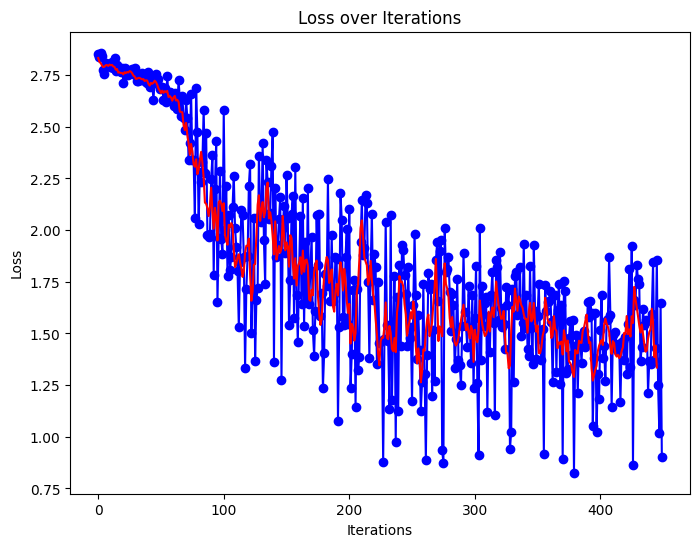

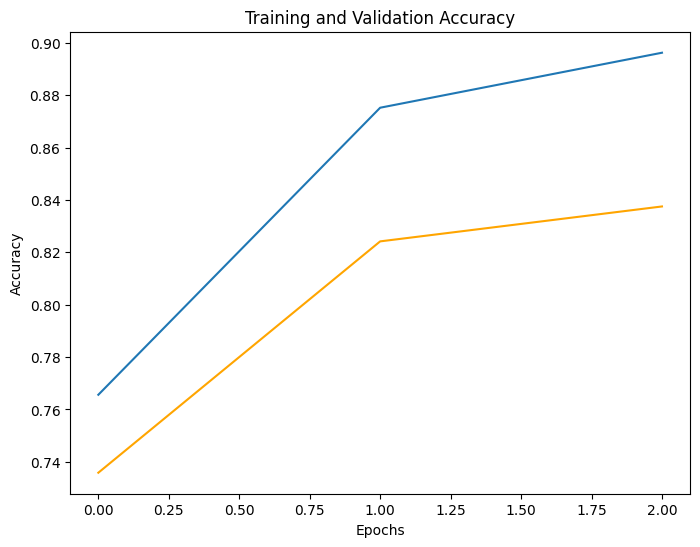

5033 1258


Epoch 1/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.936476396968407e-05]
Epoch 1 Loss: 2.3789609344800313 Train Accuracy: 0.7866             Validation Accuracy: 0.7525
Global gradient norm: 4.825552918750081


Epoch 2/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.57666351956958e-05]
Epoch 2 Loss: 1.634773618777593 Train Accuracy: 0.877             Validation Accuracy: 0.8275
Global gradient norm: 3.6306679150204015


Epoch 3/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [2.8866422562400154e-09]
Epoch 3 Loss: 1.4489302957057952 Train Accuracy: 0.899             Validation Accuracy: 0.8433333333333334
Global gradient norm: 3.664081454075465
End of Training for swin Model 2-fold
best accuracy: 0.8433333333333334


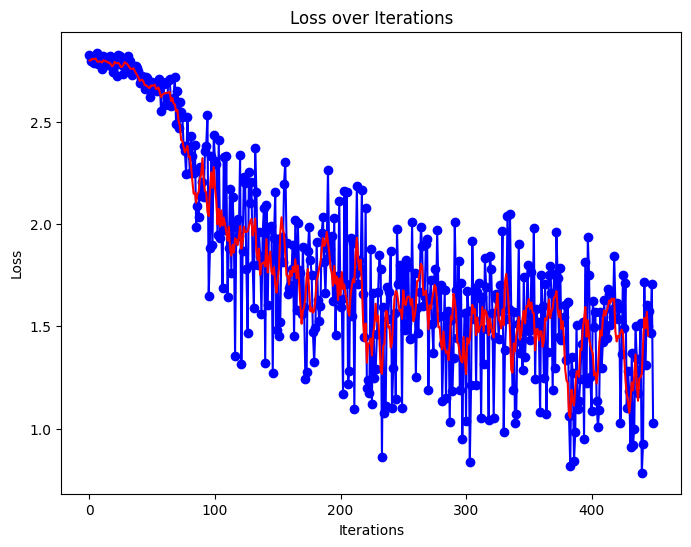

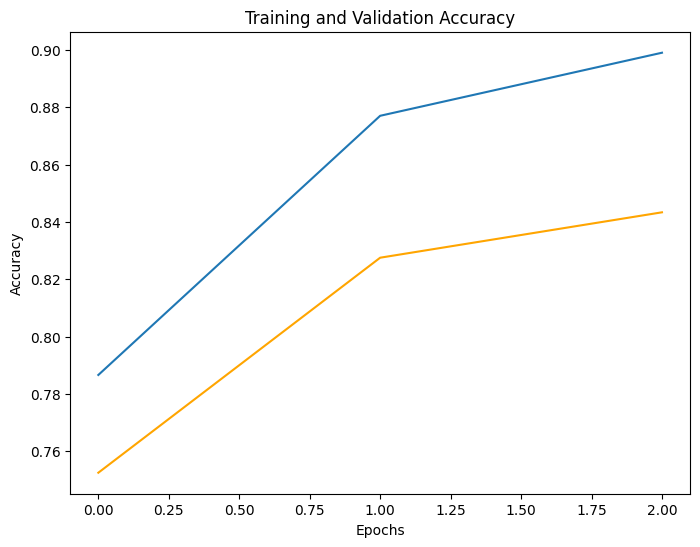

5033 1258


Epoch 1/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.936476396968407e-05]
Epoch 1 Loss: 2.36867973725001 Train Accuracy: 0.7528             Validation Accuracy: 0.7183333333333334
Global gradient norm: 4.099418530056246


Epoch 2/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.57666351956958e-05]
Epoch 2 Loss: 1.6734593220551808 Train Accuracy: 0.8704             Validation Accuracy: 0.8016666666666666
Global gradient norm: 3.54854850620498


Epoch 3/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [2.8866422562400154e-09]
Epoch 3 Loss: 1.4573663489023845 Train Accuracy: 0.9064             Validation Accuracy: 0.8325
Global gradient norm: 3.622653786991002
End of Training for swin Model 3-fold
best accuracy: 0.8325


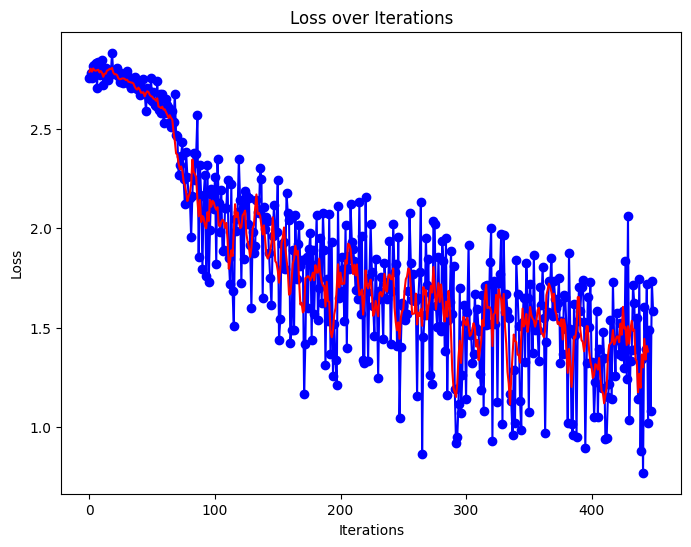

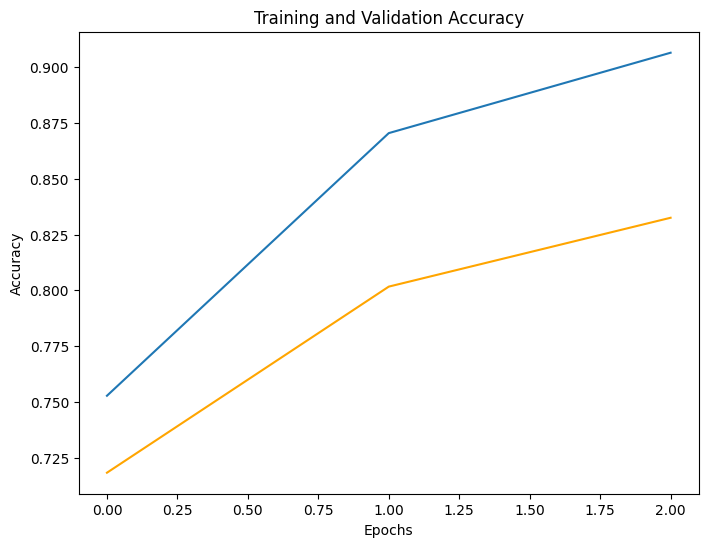

5033 1258


Epoch 1/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.936476396968407e-05]
Epoch 1 Loss: 2.357476929028829 Train Accuracy: 0.7718             Validation Accuracy: 0.7375
Global gradient norm: 3.9971300969154533


Epoch 2/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.57666351956958e-05]
Epoch 2 Loss: 1.6852491855621339 Train Accuracy: 0.8864             Validation Accuracy: 0.8266666666666667
Global gradient norm: 2.9759907074253484


Epoch 3/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [2.8866422562400154e-09]
Epoch 3 Loss: 1.4837594143549602 Train Accuracy: 0.9008             Validation Accuracy: 0.8358333333333333
Global gradient norm: 2.8987336347338233
End of Training for swin Model 4-fold
best accuracy: 0.8358333333333333


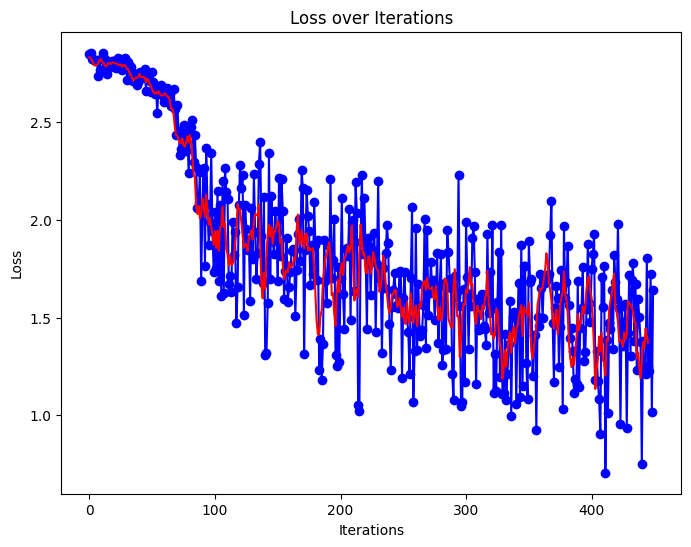

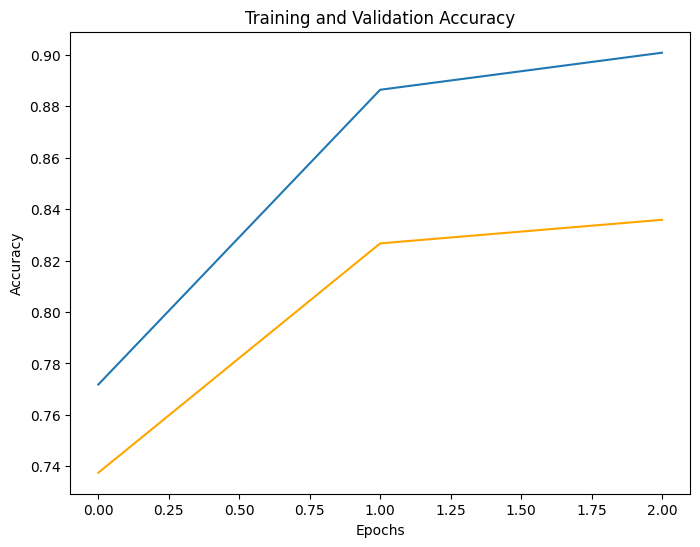

current_model_accuracies [0.8375, 0.8433333333333334, 0.8325, 0.8358333333333333]


In [32]:
k_fold = StratifiedKFold(n_splits=5, random_state=SEED, shuffle=True)
models = ['swin']

# N=100
# perm_indices = np.random.permutation(N)
# X = X[perm_indices]
# y = y[perm_indices]

for model_name in models:
    current_model_accuracies = []
    for k_id, (train_i, val_i) in enumerate(k_fold.split(X,y)):
        if k_id in [0]:
            continue
        print(len(train_i), len(val_i))
        train_set = X[train_i]
        train_label_set = y[train_i]

        val_set = X[val_i]
        val_label_set = y[val_i]

        model_config = config_manager.config[model_name]
        lr = config_manager.config.lr
        num_epochs = config_manager.config.num_epochs
        num_classes = config_manager.config.num_classes

        device = 'cuda' if torch.cuda.is_available() else 'cpu'

        train_transform = create_train_transforms()
        test_transform = create_test_transforms()

        train_data = PastaData(train_set, train_label_set, transform_list=train_transform)
        train_data_accuracy = PastaData(train_set, train_label_set, transform_list=test_transform)
        val_data = PastaData(val_set, val_label_set, transform_list=test_transform)

        train_loader = DataLoader(train_data, batch_size=model_config.batch_size, shuffle=False, drop_last=True)
        train_loader_accuracy = DataLoader(train_data_accuracy, batch_size=model_config.batch_size, shuffle=False, drop_last=True)
        val_loader = DataLoader(val_data, batch_size=model_config.batch_size, shuffle=False, drop_last=True)

        model = create_model(model_name, num_classes)
        model.to(device)

        result_dir = os.path.join(GOOGLE_DRIVE_PATH, model_config.output_dir)
        os.makedirs(result_dir, exist_ok=True)

        out_file = os.path.join(result_dir, f"{model_name}_k_fold_{k_id}.pt")

        resume = False
        if os.path.exists(out_file):
            print(f"=== {out_file} exist! ===")
            resume = True

        #  need to make dataframe from images
        loss_history, train_accuracy_history, \
        val_accuracy_history, best_accuracy, model, optimizer, scaler, end_epoch = trainer(
            model,
            train_loader,
            train_loader_accuracy,
            val_loader,
            num_epochs=num_epochs,
            lr=lr,
            model_config=model_config,
            device=device,
            resume=resume,
            out_file=out_file,
            num_classes=num_classes
        )


        current_model_accuracies.append(best_accuracy)
        print(f"End of Training for {model_name} Model {k_id}-fold")
        print(f"best accuracy: {best_accuracy}")

        save_model(model, optimizer, scaler, end_epoch, out_file, best_accuracy)
        # torch.save(best_params, os.path.join(result_dir, f"{model_name}_k_fold_{k_id}.pt"))
        draw_loss(loss_history)
        draw_train_val_accuracy(train_accuracy_history, val_accuracy_history)

    print("current_model_accuracies", current_model_accuracies)


        # avg_accuracy = torch.mean(fold_accuracies)
        # std_accuracy = torch.std(fold_accuracies)

        # general plan
        # 1. save best accuracies
        # 2. compare with different models
        # 3. train on full dataset with best performing model
        # 4. make inference


In [22]:
from pathlib import Path
import glob

In [31]:
models = ['swin']
for model_name in models:
    model_config = config_manager.config[model_name]
    result_dir = os.path.join(GOOGLE_DRIVE_PATH, model_config.output_dir)
    output_dir = Path(result_dir)
    checkpt_paths =  glob.glob(os.path.join(output_dir, "swin_k_fold_*.pt"))
    accuracy_list = []
    for checkpt_path in checkpt_paths:
        checkpoint = torch.load(checkpt_path, map_location='cpu')
        accuracy_list.append(checkpoint["best_accuracy"])
    print("Model: ", model_name)
    print("Accuracy list: ",  accuracy_list)
    print("Accuracy Mean: ", np.mean(accuracy_list))
    print("Accuracy std: ", np.std(accuracy_list))

<ipython-input-31-2a09ab5bd7ed>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpt_path, map_location='cpu')


0.8566666666666667


In [ ]:
# Inference

In [ ]:
!git pull
!git config --global user.email "tomhyhan@gmail.com"
!git config --global user.name username
!git add .
!git status
!git commit -m "updated trainer"
!git push https://{token}@github.com/{username}/{repo_name}.git

Already up to date.
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date
